In [78]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

<img src="http://drive.google.com/uc?export=view&id=1zJjN-vEjutF__7wpEq5Yibxv9BRZeC74"
     alt="HCA Logo" height="150" width="150"
     style="float: left; margin-right: 10px;">

|Name  | Value |
| :- |:-------------: |
| **Notebook:**  | **HotChili Trader Tear Sheet** |
| **Version:**  | 1.0.1c |
| **Date:**  | 2020-08-06  |
| **Copyright:**  | @2019-2020 |
| **Company:**  | **HotChili Analytics, LLC** |
| **Author   :**  | Alan Coppola|(ajjcoppola@hotchilianalytics.com) |
| **Author   :**  | Jeff Coppola|(jeff@hotchilianalytics.com) |

In [79]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import pyfolio as pf
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings('ignore')
### %pylab inline
###figsize(12, 12)

In [80]:
pd.set_option("max_colwidth", 400)
pd.set_option("display.max_rows", 100000)
pd.set_option("display.max_columns", 1000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:20,.2f}'.format

In [81]:
# Parameters for location of zipline-broker run
nb_dir = "/home/hca-blog/hca/hca-live-rel/nb/" 
ans_pkl = "HCA_Trendfollowing.pkl"
ans_data_file = nb_dir + ans_pkl

# Read in backtest results for analysis
perf=pd.read_pickle(ans_data_file)

In [82]:
perf.columns
#dir(perf)

Index(['SPY', 'algo_volatility', 'algorithm_period_return', 'alpha',
       'benchmark_period_return', 'benchmark_volatility', 'beta',
       'capital_used', 'ending_cash', 'ending_exposure', 'ending_value',
       'excess_return', 'gross_leverage', 'long_exposure', 'long_value',
       'longs_count', 'max_drawdown', 'max_leverage', 'net_leverage', 'orders',
       'period_close', 'period_label', 'period_open', 'pnl', 'portfolio_value',
       'positions', 'returns', 'sharpe', 'short_exposure', 'short_value',
       'shorts_count', 'sortino', 'starting_cash', 'starting_exposure',
       'starting_value', 'trading_days', 'transactions',
       'treasury_period_return'],
      dtype='object')

In [83]:
perf.shape

(657, 38)

In [84]:
import pandas as pd
returns, positions, transactions= pf.utils.extract_rets_pos_txn_from_zipline(perf)

In [85]:
positions

sid,Equity(12782 [SHY]),Equity(13247 [SPY]),cash
index,,,
2018-01-03 00:00:00+00:00,0.00,"9,962,491.98","32,489.94"
2018-01-04 00:00:00+00:00,0.00,"10,004,482.74","32,489.94"
2018-01-05 00:00:00+00:00,0.00,"10,071,152.28","32,489.94"
2018-01-08 00:00:00+00:00,0.00,"10,089,569.28","32,489.94"
2018-01-09 00:00:00+00:00,0.00,"10,112,406.36","32,489.94"
2018-01-10 00:00:00+00:00,0.00,"10,096,936.08","32,489.94"
2018-01-11 00:00:00+00:00,0.00,"10,170,604.08","32,489.94"
2018-01-12 00:00:00+00:00,0.00,"10,236,905.28","32,489.94"
2018-01-16 00:00:00+00:00,0.00,"10,201,912.98","32,489.94"


In [86]:
transactions

,amount,commission,dt,order_id,price,sid,symbol,txn_dollars
2018-01-03 21:00:00+00:00,36834,None,2018-01-03 21:00:00+00:00,1fe59ef5ec8344d3b005207fec90125f,270.61,Equity(13247 [SPY]),Equity(13247 [SPY]),"-9,967,473.23"
2018-02-02 21:00:00+00:00,-254,None,2018-02-02 21:00:00+00:00,481855044f974b7b82b80b7128707627,275.31,Equity(13247 [SPY]),Equity(13247 [SPY]),"69,929.32"
2018-03-02 21:00:00+00:00,12,None,2018-03-02 21:00:00+00:00,386f718d37724107bf4deea131beafad,269.21,Equity(13247 [SPY]),Equity(13247 [SPY]),"-3,230.57"
2018-04-03 20:00:00+00:00,-36592,None,2018-04-03 20:00:00+00:00,c7fc564aaf5446c1b016a15dd8335f4b,260.64,Equity(13247 [SPY]),Equity(13247 [SPY]),"9,537,288.22"
2018-04-03 20:00:00+00:00,113367,None,2018-04-03 20:00:00+00:00,6284e645d779491e8c5d4a561de963c9,83.49,Equity(12782 [SHY]),Equity(12782 [SHY]),"-9,465,206.39"
2018-05-02 20:00:00+00:00,1521,None,2018-05-02 20:00:00+00:00,0099ba6e7015428981eb32d5a8183236,83.20,Equity(12782 [SHY]),Equity(12782 [SHY]),"-126,549.60"
2018-06-04 20:00:00+00:00,35017,None,2018-06-04 20:00:00+00:00,0e5cd83b044b4660a6de880d8a351968,275.04,Equity(13247 [SPY]),Equity(13247 [SPY]),"-9,630,986.39"
2018-06-04 20:00:00+00:00,-114633,None,2018-06-04 20:00:00+00:00,0f90d56179b74c9b917dd7b6a9d80ae1,83.16,Equity(12782 [SHY]),Equity(12782 [SHY]),"9,532,696.87"
2018-06-05 20:00:00+00:00,-255,None,2018-06-05 20:00:00+00:00,5a34246c95ea43f98c2d9d26aa5d7c58,83.21,Equity(12782 [SHY]),Equity(12782 [SHY]),"21,218.14"
2018-07-03 17:00:00+00:00,-68,None,2018-07-03 17:00:00+00:00,a43509f55b974693a0524d6d1bccadaa,270.76,Equity(13247 [SPY]),Equity(13247 [SPY]),"18,411.99"


In [87]:
import sys

print("Tear Sheet File : {}".format(ans_data_file))
print("-----------------------------------")
print("Python version={}".format(sys.version))
print("Matplotlib version={}".format(mp.__version__))
print("Numpy version={}".format(np.version.version))


Tear Sheet File : /home/hca-blog/hca/hca-live-rel/nb/HCA_Trendfollowing.pkl
-----------------------------------
Python version=3.6.7 | packaged by conda-forge | (default, Feb 28 2019, 09:07:38) 
[GCC 7.3.0]
Matplotlib version=3.0.3
Numpy version=1.14.1


In [88]:
#pf.plot_drawdown_periods(returns, top=5).set_xlabel('Date')

In [89]:
#returns.plot()

In [90]:
#transactions

In [91]:
#from datetime import datetime
#import pytz
#start = datetime(2017, 2, 11, 0, 0, 0, 0, pytz.utc)
#end = datetime(2019, 3, 14, 0, 0, 0, 0, pytz.utc)
#s=pd.Timestamp(start)

In [92]:
#pf.create_position_tear_sheet(returns=returns,positions=positions)
#pf.plot_perf_stats(returns= returns, factor_returns=returns)

In [93]:
sim_start=perf.index[0]
sim_end= perf.index[-1]
print("start={}  end={}".format(sim_start,sim_end))


start=2018-01-02 00:00:00+00:00  end=2020-08-10 00:00:00+00:00


Start date,2018-01-02
End date,2020-08-10
Total months,31
,Backtest
Annual return,-3.1%
Cumulative returns,-7.8%
Annual volatility,20.5%
Sharpe ratio,-0.05
Calmar ratio,-0.09
Stability,0.10
Max drawdown,-33.4%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,33.38,2020-02-19,2020-03-23,NaT,NaN
1,11.60,2018-01-26,2018-10-29,2019-07-12,381
2,5.96,2019-07-26,2019-08-05,2019-12-20,106
3,3.05,2020-01-17,2020-01-31,2020-02-05,14
4,1.18,2019-07-15,2019-07-19,2019-07-24,8


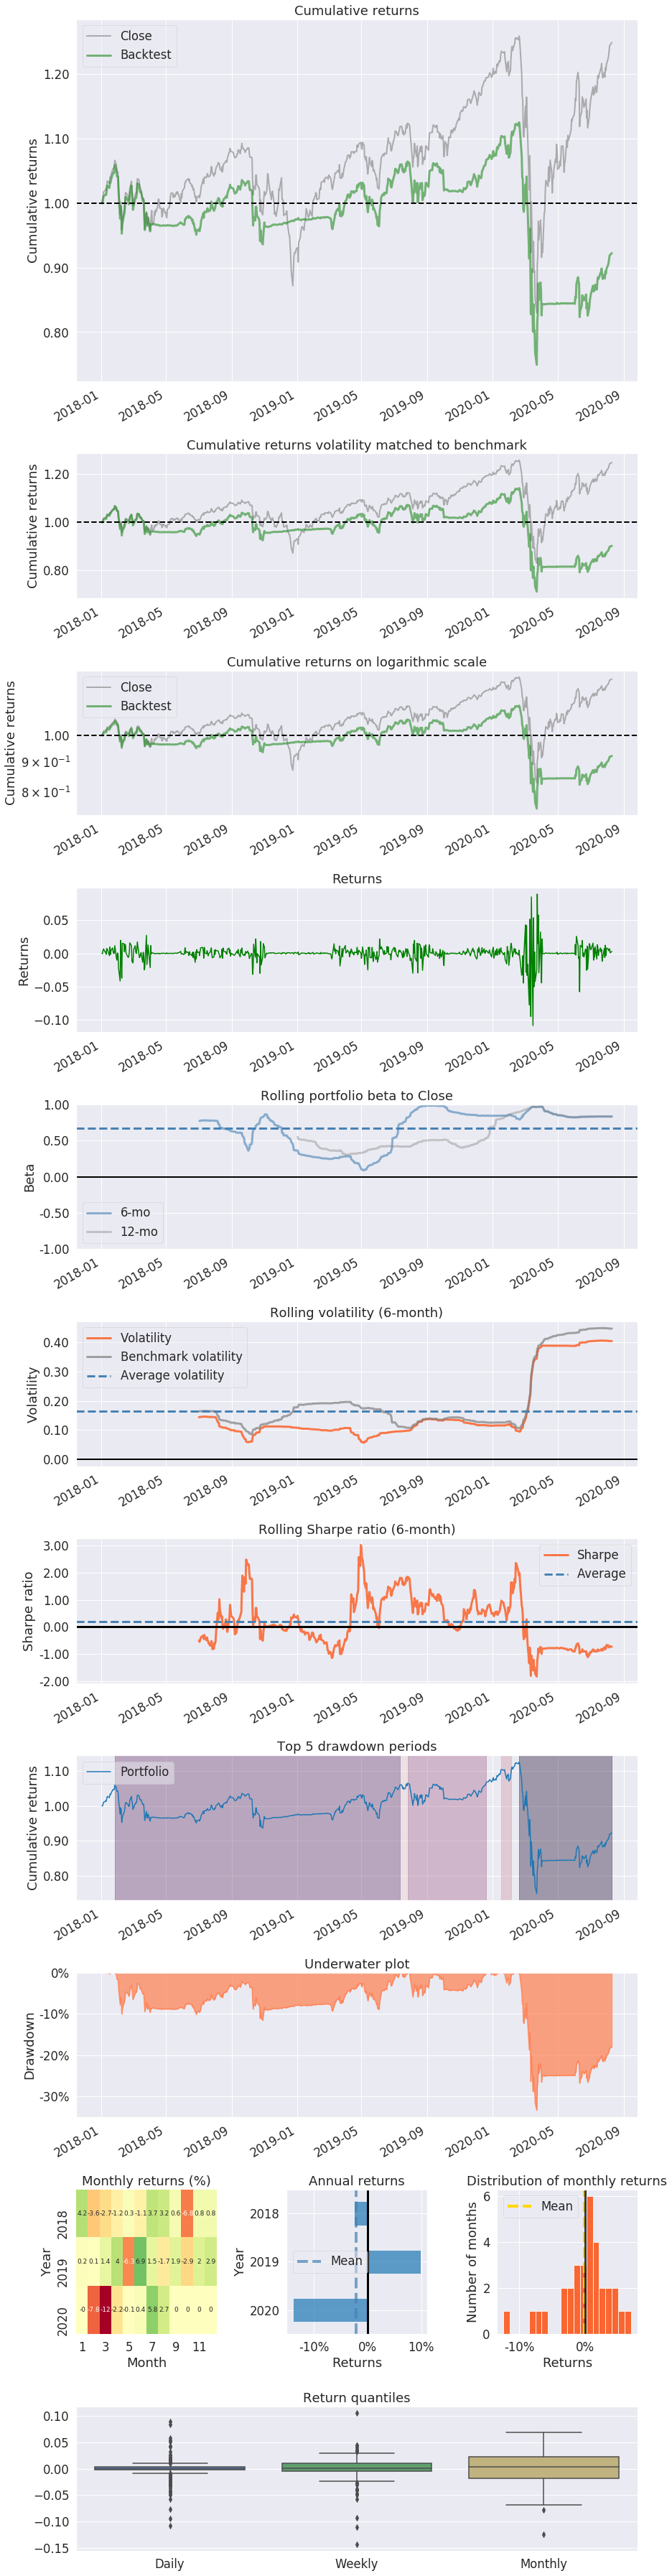

Stress Events,mean,min,max
New Normal,-0.00%,-10.82%,8.88%


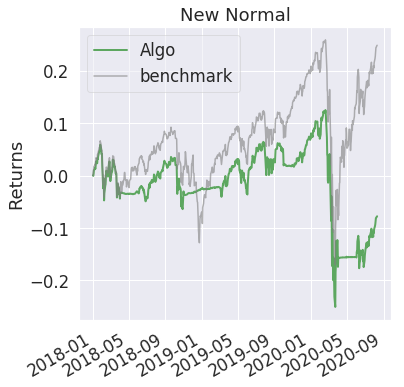

Top 10 long positions of all time,max
sid,
SHY,100.96%
SPY,99.92%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
SHY,100.96%
SPY,99.92%


All positions ever held,max
sid,
SHY,100.96%
SPY,99.92%


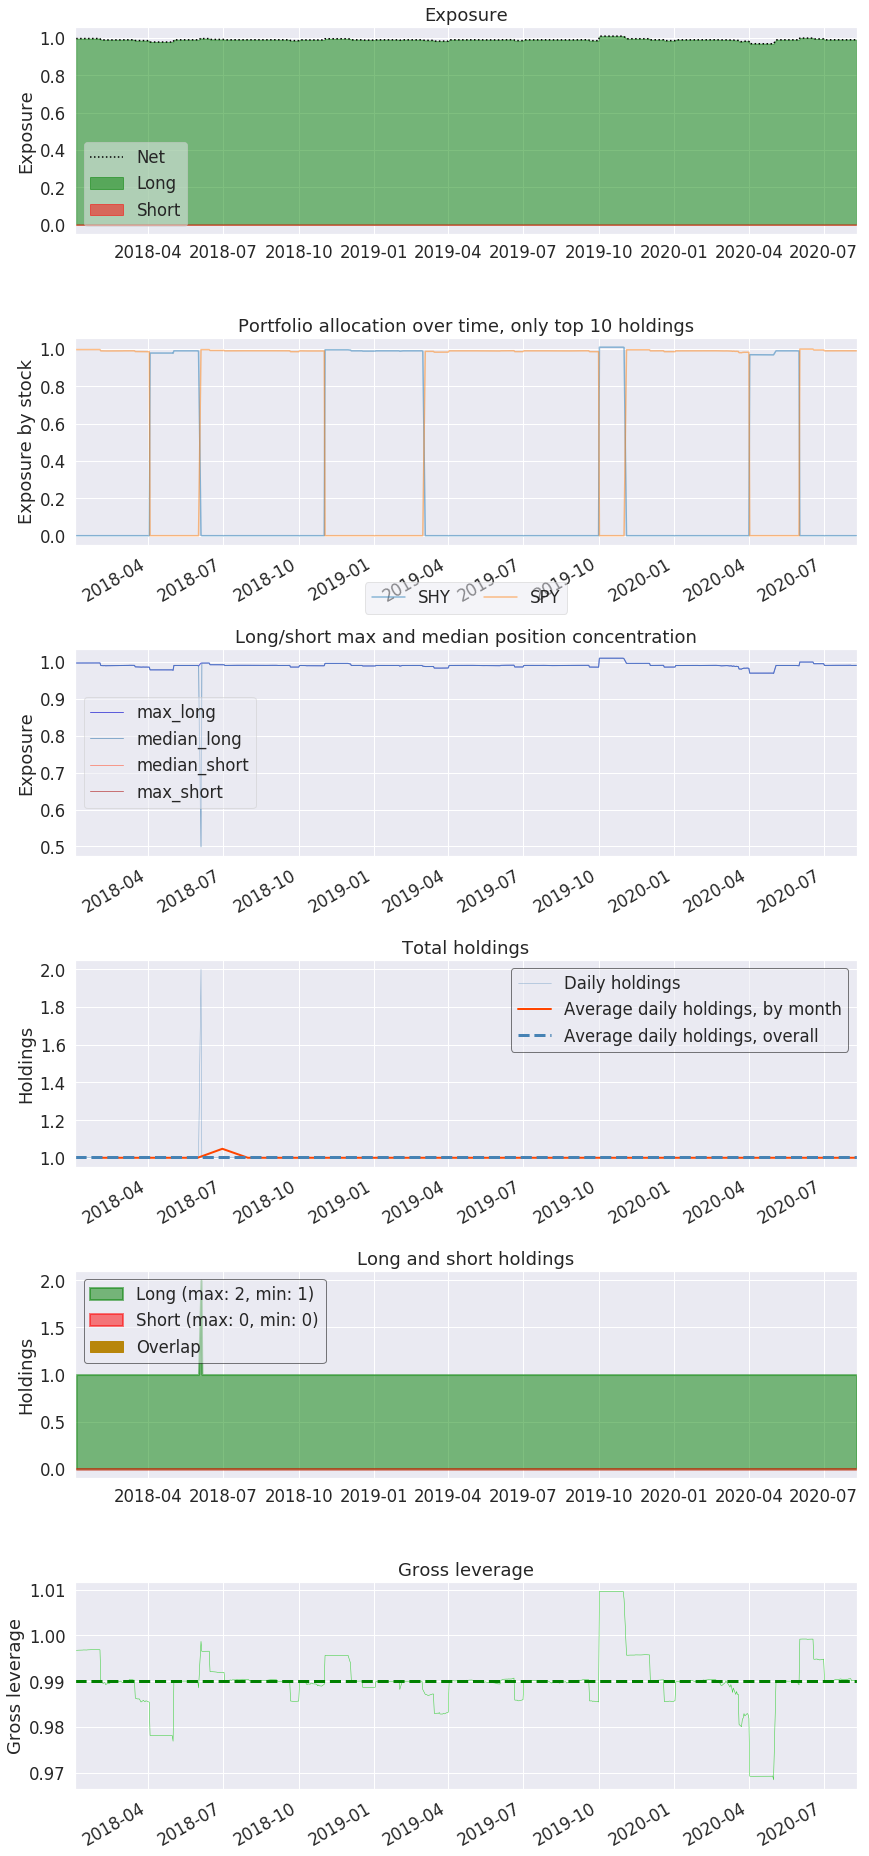

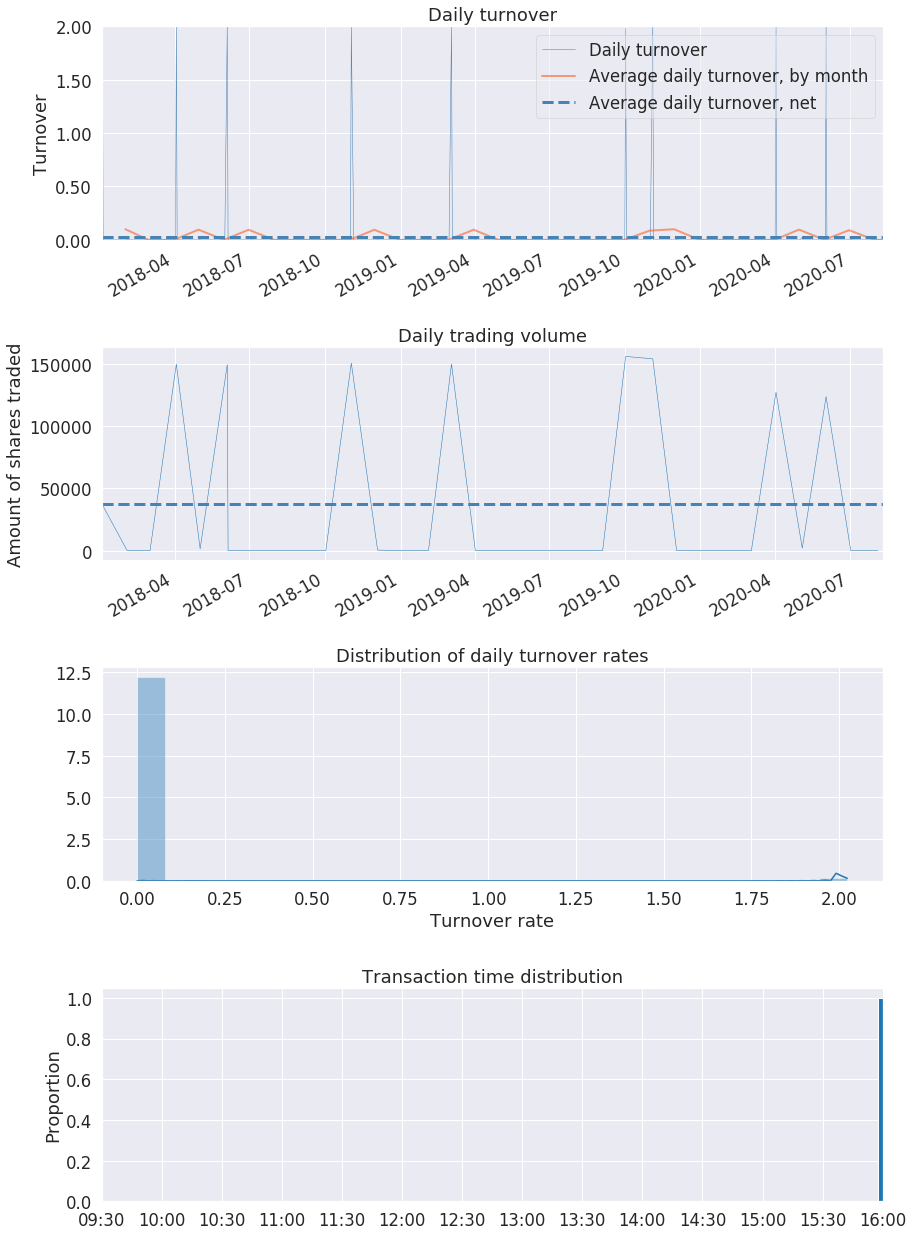

Summary stats,All trades,Long trades
Total number of round_trips,19.00,19.00
Percent profitable,0.63,0.63
Winning round_trips,12.00,12.00
Losing round_trips,7.00,7.00
Even round_trips,0.00,0.00


PnL stats,All trades,Long trades
Total profit,$-1302903.72,$-1302903.72
Gross profit,$1103744.56,$1103744.56
Gross loss,$-2406648.28,$-2406648.28
Profit factor,$0.46,$0.46
Avg. trade net profit,$-68573.88,$-68573.88
Avg. winning trade,$91978.71,$91978.71
Avg. losing trade,$-343806.90,$-343806.90
Ratio Avg. Win:Avg. Loss,$0.27,$0.27
Largest winning trade,$744030.16,$744030.16
Largest losing trade,$-1841139.33,$-1841139.33


Duration stats,All trades,Long trades
Avg duration,74 days 01:15:47.421052,74 days 01:15:47.421052
Median duration,61 days 00:00:00,61 days 00:00:00
Longest duration,211 days 23:00:00,211 days 23:00:00
Shortest duration,28 days 21:00:00,28 days 21:00:00


Return stats,All trades,Long trades
Avg returns all round_trips,-0.87%,-0.87%
Avg returns winning,0.97%,0.97%
Avg returns losing,-4.03%,-4.03%
Median returns all round_trips,0.00%,0.00%
Median returns winning,0.00%,0.00%
Median returns losing,-0.39%,-0.39%
Largest winning trade,8.09%,8.09%
Largest losing trade,-22.29%,-22.29%


Symbol stats,SHY,SPY
Avg returns all round_trips,-0.03%,-1.26%
Avg returns winning,0.23%,1.21%
Avg returns losing,-0.29%,-6.83%
Median returns all round_trips,-0.08%,0.00%
Median returns winning,0.00%,0.00%
Median returns losing,-0.30%,-2.51%
Largest winning trade,0.70%,8.09%
Largest losing trade,-0.39%,-22.29%


Profitability (PnL / PnL total) per name,
symbol,
SPY,98.92%
SHY,1.08%


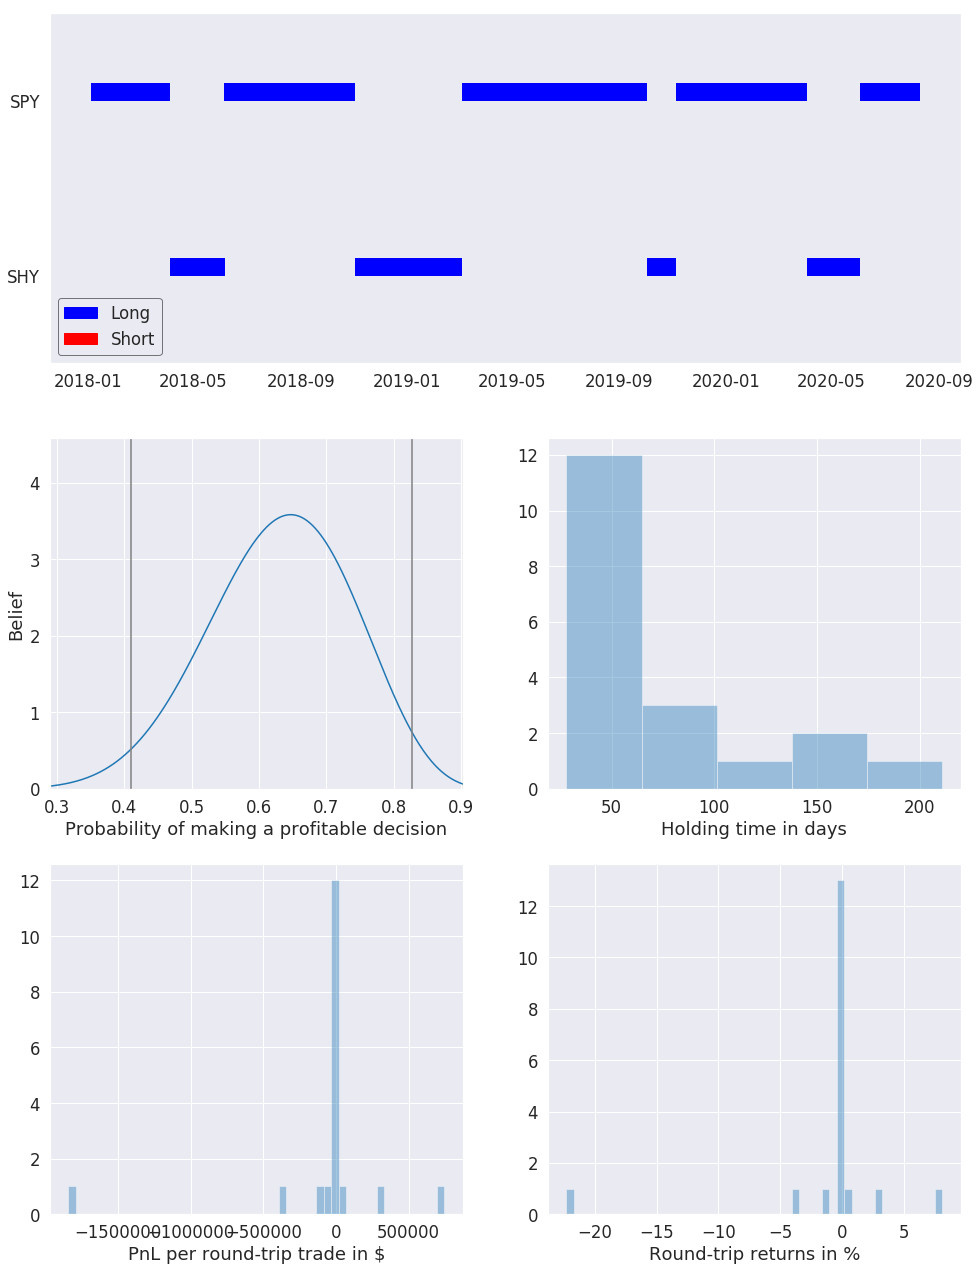

In [94]:
#%%pixie_debugger

from zipline.data import benchmarks
# Set up benchmark Asset 
spy_bm_ret    = benchmarks.get_benchmark_returns(symbol='SPY', first_date=sim_start, last_date=sim_end)
spy_bm_ret    = spy_bm_ret[sim_start:sim_end]
spy_bm_ret[0] = 0.0 # Normalize benchmark returns to start at 0.0.
perf          = perf[sim_start:sim_end]

returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)

pf.create_full_tear_sheet(returns, positions=positions, transactions=transactions, bootstrap=None,benchmark_rets=spy_bm_ret, round_trips=True)
#pf.create_simple_tear_sheet(returns=returns,positions=positions,transactions=transactions)